# Assignment 4: Benchmarking Neural Nets with the XOR Problem

### CS 4774 Machine Learning - Department of Computer Science - University of Virginia
In this assignment, you will implement your own neural networks to classify non-linear data from the XOR dataset. For references, you may refer to my [lecture 10](https://docs.google.com/presentation/d/1otQfmMomWctLZKI3hHKAA4lLkbXFtagLaQov8gNh4LI/edit?usp=sharing) and [Colab Notebook 10](https://colab.research.google.com/drive/1x5biI3dP5YvvDEI0wapJcSgQNnATDzNe) if you need additional sample codes to help with your assignment. For deliverables, you must write code in Python/Tensorflow and submit **this** Jupyter Notebook file (.ipynb) to earn a total of 100 pts. Note that you must save your Notebook filename under this format: **yourUvaUserId_assignment_4_ann.ipynb**.



In [ ]:
# You might want to use the following packages
import numpy as np
import os
%tensorflow_version 2.x
import tensorflow as tf

from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from functools import partial

---
## 1. THE DATASET AND VISUALIZATION

We will use the non-linear toy data called the XOR dataset. You may use the code snippet below to generate the train/validate/test set. Feel free to change the number of samples, and noise level. To keep the ratio between the sets consistent, please do not change the test_size and random_state parameters.



(720, 2)
(200, 2)
(80, 2)


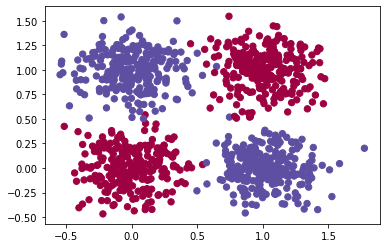

In [ ]:
def make_xor(n_points):
    centers = np.array([[0,0],[0,1],[1,0],[1,1]])
    labels = np.array([0,1,1,0])
    data = np.array([]).reshape(-1,3)
    for center, label in zip(centers,labels):
        points = np.random.normal(loc=center,scale=0.2,size=(n_points//4,2))
        points_labels = np.hstack((points,label*np.ones(n_points//4).reshape((-1, 1))))
        data = np.vstack((data,points_labels))
    return (data[:,[0,1]],data[:,2])


X, y = make_xor(1000)
y=y.astype(np.int64)
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size= 0.1, random_state=49) 
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.Spectral)

In [ ]:
X_train.shape

(720, 2)

---
## 2. TRAIN A SIMPLE ANN FOR CLASSIFICATION TASK (20 pts)

Use the standard libarary of Neural Net on the training data, and then test the classifier on the test data. You will create a simple ANN with 3 layers: an Input Layer, a Hidden Layer and an Output Layer. For each layer, you can specify the number of nodes appropriate for the XOR problem. Also, feel free to tune the network as you see fit. You have to report the accuracy of the network on the validation set.

In [ ]:
from tensorflow import keras

# Your code here
model = keras.models.Sequential([
    keras.layers.Dense(12, input_shape=[2], activation='relu'),
    keras.layers.Dense(16, activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])

In [ ]:
# compile the model
model.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

In [ ]:
# train the model
model.fit(X_train, y_train, epochs=100,
              validation_data=(X_val, y_val),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
23/23 [==============================] - 0s 6ms/step - loss: 0.2475 - binary_accuracy: 0.4833 - val_loss: 0.2508 - val_binary_accuracy: 0.3750
Epoch 2/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2387 - binary_accuracy: 0.5000 - val_loss: 0.2406 - val_binary_accuracy: 0.5625
Epoch 3/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2305 - binary_accuracy: 0.6958 - val_loss: 0.2303 - val_binary_accuracy: 0.6500
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2214 - binary_accuracy: 0.7514 - val_loss: 0.2198 - val_binary_accuracy: 0.6875
Epoch 5/100
23/23 [==============================] - 0s 3ms/step - loss: 0.2109 - binary_accuracy: 0.7903 - val_loss: 0.2078 - val_binary_accuracy: 0.7875
Epoch 6/100
23/23 [==============================] - 0s 3ms/step - loss: 0.1979 - binary_accuracy: 0.8111 - val_loss: 0.1940 - val_binary_accuracy: 0.9000
Epoch 7/100
23/23 [==============================] - 0s 3ms/step - los

In [ ]:
# evaluate on test data
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.0057 - binary_accuracy: 0.9950


[0.005702503491193056, 0.9950000047683716]

- - -
## 3. IMPLEMENTING YOUR OWN SIMPLE NEURAL NETWORK (60 pts)

Now that you see how the standard library ANN performs on the XOR dataset, you will attempt to implement your own version of the neural network. To help you, a template has been created including the backpropagation. Essensially, you will get the backward gradients for free. However, please note that the backprop implementation assume usage of tanh activation for the hidden layer and softmax for the output layer. There are some subtasks which you need to implement in order to get the network to work properly.

In [ ]:
from sklearn.base import BaseEstimator

class MyNeuralNet(BaseEstimator):
    """Your implementation of a simple neural network"""

    def __init__ (self, nn_input_dim, nn_hidden_dim, nn_output_dim):
        """
        Initialize the network with random weights

        @param: nn_input_dim: Number of nodes in the input layer
        @param: nn_hidden_dim: Number of nodes in the hidden layer
        @param: nn_output_dim: Number of nodes in the output layer
        """
        # SUBTASK 1 (10 pts): Initialize the parameters to random values.
        np.random.seed(49)
        self.W1 = np.random.randn(nn_input_dim, nn_hidden_dim)
        self.b1 = np.zeros((1, nn_hidden_dim))
        self.W2 = np.random.randn(nn_hidden_dim, nn_output_dim)
        self.b2 = np.zeros((1, nn_output_dim))
        self.alpha = 0.01
        
    def loss(self, X, y):
        """
        Evaluate the average loss on the dataset
        """

        # Forward propagation will be needed to calculate the loss
        a1,a2 = self.forward_pass(X)
        # SUBTASK 2 (10 pts): Calculate the loss using log-loss probabilities using a2.
        # You will need to return the average loss on the data 
        data_loss = self.logloss(a2, y)
        return data_loss
    
    # softmax function
    def softmax(self, z):
      exp = np.exp(z)
      p = exp/np.sum(exp, axis=1, keepdims=True)
      return p

    # log-loss probability function
    def logloss(self, a, y):
      m = len(y)
      logs = np.sum(-np.log(a[range(m), y]))/m
      #logloss = -np.sum(np.matmul(y,np.log(a)))/m
      return logs


    def forward_pass(self, X):
        """
        Pass the signal forward through the layers.
        @param: X: feature
        @return: a1: saved value of the output of the hidden layer
        @return: a2: activated return value of the output layer.
        """
        # SUBTASK 3 (20 pts): Implement Forward propagation.
        # Note that you must implement tanh activiation for the hiden layer, and softmax for the output layer
        z1 = np.dot(X, self.W1) + self.b1
        #z1 = z1.T + self.b1
        a1 = np.tanh(z1)
        z2 = np.dot(a1, self.W2) + self.b2
        #z2 = z2.T + self.b2
        a2 = self.softmax(z2)
        return a1, a2 

    def backward_pass(self,a1,a2,X,y):
        """
        Pass the signal back and compute the gradient

        @param: X: feature
        @param: y: label
        @param: a1: saved value of the output of the hidden layer
        @param: a2: activated return value of the output layer.

        @return: dW1: the gradient of W1
        @return: db1: the gradient of b1
        @return: dW2: the gradient of W2
        @return: db2: the gradient of b2
        """
        # You do not have to change this function, ...
        # unless you are advanced and want to use different activation function.
        m = len(y) # number of example
        delta2 = a2
        y.astype(np.int64)
        delta2[range(m), y] -= 1
        dW2 = (a1.T).dot(delta2)
        db2 = np.sum(delta2, axis=0, keepdims=True)
        delta1 = delta2.dot(self.W2.T) * (1 - np.power(a1, 2))
        dW1 = np.dot(X.T, delta1)
        db1 = np.sum(delta1, axis=0)
        return dW1, db1, dW2, db2

    def fit(self, X, y, epochs, X_val, y_val):
        """
        Learns parameters for the neural network and returns the model.
        
        @param: X: the training feature
        @param: y: the train label
        @param: epochs: Number of passes through the training data for gradient descent
        @param: X_val: the feature of validation set
        @param: y_val: the label of validation set
        """

        # Gradient descent. For each batch...
        for i in range(0, epochs):

            # Forward pass
            a1,a2 = self.forward_pass(X);

            # Backpropagation
            dW1, db1, dW2, db2 = self.backward_pass(a1,a2,X,y)

            # SUBTASK 4 (10 pts): Compute the gradient descent parameter update
            self.W1 = self.W1 - self.alpha*dW1
            self.b1 = self.b1 - self.alpha*db1
            self.W2 = self.W2 - self.alpha*dW2
            self.b2 = self.b2 - self.alpha*db2
        
            # Print the loss and validation accuracy at current epoch.
            if i % 10 == 0:
                print("Epoch %i/%i - loss: %f - accuracy: %f - val_loss: %f - val_acc: %f" 
                      %(i,epochs, self.loss(X_train, y_train), self.evaluate(X_train, y_train),
                        self.loss(X_val, y_val), self.evaluate(X_val,y_val)))


    def evaluate(self, X, y):
        """
        Evaluate the accuracy of the model
        """
        y_pred = self.predict(X)
        return sum(y_pred == y)/len(y)

    def predict(self, X):
        """
        Predict an output

        @param: X: feature
        @return: y_pred: predicted label (0 or 1)
        """
        # SUBTASK 5 (10 pts): Implement the prediction process. 
        # Hint: It should include a forward pass, and then use the class with higher probability.
        a1, a2 = self.forward_pass(X)
        y_pred = np.argmax(a2, axis=1)
        return y_pred


    def plot_decision_boundary(self, pred_func):
        """
        Plot a decision boundary for visualization purpose.
        If you don't fully understand this function don't worry, it just generates the contour plot below.
        """
        # Set min and max values and give it some padding
        x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
        y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
        h = 0.01
        # Generate a grid of points with distance h between them
        xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
        # Predict the function value for the whole gid
        Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        # Plot the contour and training examples
        plt.contourf(xx, yy, Z, cmap=plt.cm.Pastel1)
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)


---
## 4. REFLECT ON THE COMPARISON BETWEEN YOUR IMPLEMENTATION TO THE STANDARD LIBRARY (20 pts)
Now that you have implemented your own Neural Net class, let's use it! Create at least 3 instances of your Neural Net class, each with a different number of nodes in the hiden layer, tune it with the appropriate learning rate and number of iteration. You will test their performance in the Xor dataset and report the test accuracy metrics for each instance of your neural network.

Based on the test accuracy, compare your models with the standard library version. 

Epoch 0/200 - loss: 0.586413 - accuracy: 0.755556 - val_loss: 0.700333 - val_acc: 0.675000
Epoch 10/200 - loss: 9.725115 - accuracy: 0.513889 - val_loss: 11.233057 - val_acc: 0.412500
Epoch 20/200 - loss: 2.514084 - accuracy: 0.829167 - val_loss: 3.089395 - val_acc: 0.800000
Epoch 30/200 - loss: 0.108876 - accuracy: 0.975000 - val_loss: 0.089194 - val_acc: 0.962500
Epoch 40/200 - loss: 0.099481 - accuracy: 0.972222 - val_loss: 0.123893 - val_acc: 0.962500
Epoch 50/200 - loss: 0.096665 - accuracy: 0.970833 - val_loss: 0.126164 - val_acc: 0.950000
Epoch 60/200 - loss: 0.065955 - accuracy: 0.972222 - val_loss: 0.080283 - val_acc: 0.962500
Epoch 70/200 - loss: 0.053137 - accuracy: 0.977778 - val_loss: 0.057162 - val_acc: 0.987500
Epoch 80/200 - loss: 0.274675 - accuracy: 0.950000 - val_loss: 0.401963 - val_acc: 0.925000
Epoch 90/200 - loss: 0.033793 - accuracy: 0.984722 - val_loss: 0.094216 - val_acc: 0.975000
Epoch 100/200 - loss: 0.120409 - accuracy: 0.968056 - val_loss: 0.226416 - val_a

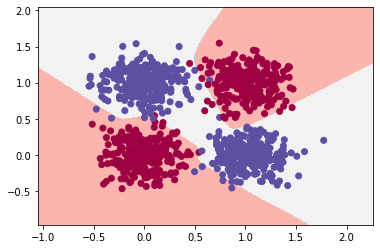

In [ ]:
# MODEL 1: Some hyperparameters are provided, but feel free to change them.
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
nn_hidden_dim = 6 # hiden layer dimensionality
alpha = 0.001 # learning rate for gradient descent
epochs = 200 # number of iteration/epochs
# Build a model with 3 layer
myModel1 = MyNeuralNet(nn_input_dim, nn_hidden_dim, nn_output_dim);
myModel1.fit(X_train, y_train, epochs, X_val, y_val)

# Plot the decision boundary
myModel1.plot_decision_boundary(lambda x: myModel1.predict(x))
# See the weights and biases of the network
print(myModel1.W1)
print(myModel1.b1)
print(myModel1.W2)
print(myModel1.b2)

In [ ]:
myModel1.evaluate(X_test, y_test)*100

97.0

Epoch 0/200 - loss: 7.205390 - accuracy: 0.513889 - val_loss: 8.679252 - val_acc: 0.412500
Epoch 10/200 - loss: 31.636473 - accuracy: 0.513889 - val_loss: 38.964201 - val_acc: 0.412500
Epoch 20/200 - loss: 11.199170 - accuracy: 0.513889 - val_loss: 13.677415 - val_acc: 0.412500
Epoch 30/200 - loss: 0.338982 - accuracy: 0.973611 - val_loss: 0.401432 - val_acc: 0.962500
Epoch 40/200 - loss: 0.195749 - accuracy: 0.958333 - val_loss: 0.213488 - val_acc: 0.950000
Epoch 50/200 - loss: 0.139286 - accuracy: 0.958333 - val_loss: 0.233011 - val_acc: 0.937500
Epoch 60/200 - loss: 0.088660 - accuracy: 0.973611 - val_loss: 0.254434 - val_acc: 0.950000
Epoch 70/200 - loss: 0.061538 - accuracy: 0.977778 - val_loss: 0.205374 - val_acc: 0.962500
Epoch 80/200 - loss: 0.073295 - accuracy: 0.976389 - val_loss: 0.225442 - val_acc: 0.950000
Epoch 90/200 - loss: 0.057475 - accuracy: 0.977778 - val_loss: 0.199270 - val_acc: 0.975000
Epoch 100/200 - loss: 0.052482 - accuracy: 0.977778 - val_loss: 0.189887 - va

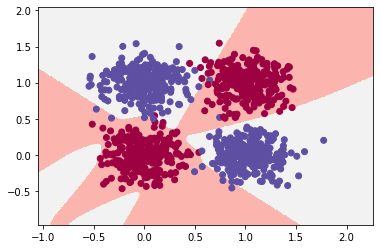

In [ ]:
# MODEL 2 here
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
nn_hidden_dim = 12 # hiden layer dimensionality
alpha = 0.001 # learning rate for gradient descent
epochs = 200 # number of iteration/epochs
myModel2 = MyNeuralNet(nn_input_dim, nn_hidden_dim, nn_output_dim);
myModel2.fit(X_train, y_train, epochs, X_val, y_val)
# Plot the decision boundary
myModel2.plot_decision_boundary(lambda x: myModel2.predict(x))

In [ ]:
myModel2.evaluate(X_test, y_test)*100

97.5

Epoch 0/500 - loss: 2.531698 - accuracy: 0.486111 - val_loss: 2.157018 - val_acc: 0.525000
Epoch 10/500 - loss: 16.237964 - accuracy: 0.486111 - val_loss: 12.985389 - val_acc: 0.587500
Epoch 20/500 - loss: 9.503378 - accuracy: 0.645833 - val_loss: 7.464656 - val_acc: 0.775000
Epoch 30/500 - loss: 6.819530 - accuracy: 0.702778 - val_loss: 5.434156 - val_acc: 0.787500
Epoch 40/500 - loss: 5.249331 - accuracy: 0.718056 - val_loss: 5.215169 - val_acc: 0.775000
Epoch 50/500 - loss: 3.548486 - accuracy: 0.698611 - val_loss: 3.061887 - val_acc: 0.762500
Epoch 60/500 - loss: 3.025655 - accuracy: 0.725000 - val_loss: 4.080843 - val_acc: 0.762500
Epoch 70/500 - loss: 1.816631 - accuracy: 0.737500 - val_loss: 2.078542 - val_acc: 0.775000
Epoch 80/500 - loss: 0.885950 - accuracy: 0.695833 - val_loss: 0.993210 - val_acc: 0.775000
Epoch 90/500 - loss: 4.516097 - accuracy: 0.673611 - val_loss: 4.358507 - val_acc: 0.775000
Epoch 100/500 - loss: 0.267231 - accuracy: 0.972222 - val_loss: 0.478699 - val_

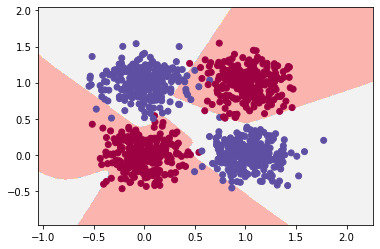

In [ ]:
# MODEL 3 here
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
nn_hidden_dim = 14 # hiden layer dimensionality
alpha = 0.0001 # learning rate for gradient descent
epochs = 500 # number of iteration/epochs
myModel3 = MyNeuralNet(nn_input_dim, nn_hidden_dim, nn_output_dim);
myModel3.fit(X_train, y_train, epochs, X_val, y_val)
# Plot the decision boundary
myModel3.plot_decision_boundary(lambda x: myModel3.predict(x))

In [ ]:
myModel3.evaluate(X_test, y_test)*100

98.0

Epoch 0/500 - loss: 3.421094 - accuracy: 0.456944 - val_loss: 2.826320 - val_acc: 0.512500
Epoch 10/500 - loss: 7.506251 - accuracy: 0.486111 - val_loss: 6.054151 - val_acc: 0.587500
Epoch 20/500 - loss: 20.723971 - accuracy: 0.565278 - val_loss: 14.758257 - val_acc: 0.725000
Epoch 30/500 - loss: 24.142551 - accuracy: 0.623611 - val_loss: 18.562856 - val_acc: 0.662500
Epoch 40/500 - loss: 1.181442 - accuracy: 0.918056 - val_loss: 1.026742 - val_acc: 0.912500
Epoch 50/500 - loss: 0.222179 - accuracy: 0.977778 - val_loss: 0.348457 - val_acc: 0.975000
Epoch 60/500 - loss: 0.194731 - accuracy: 0.976389 - val_loss: 0.279116 - val_acc: 0.975000
Epoch 70/500 - loss: 0.179213 - accuracy: 0.973611 - val_loss: 0.284226 - val_acc: 0.962500
Epoch 80/500 - loss: 0.221431 - accuracy: 0.970833 - val_loss: 0.357398 - val_acc: 0.950000
Epoch 90/500 - loss: 0.175132 - accuracy: 0.976389 - val_loss: 0.175876 - val_acc: 0.975000
Epoch 100/500 - loss: 0.136193 - accuracy: 0.976389 - val_loss: 0.109358 - va

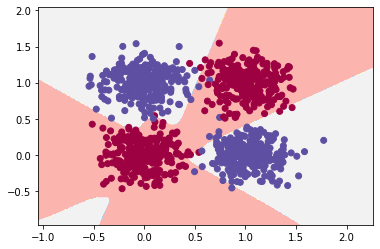

In [ ]:
# MODEL 4 here
nn_input_dim = 2 # input layer dimensionality
nn_output_dim = 2 # output layer dimensionality
nn_hidden_dim = 16 # hiden layer dimensionality
alpha = 0.0001 # learning rate for gradient descent
epochs = 500 # number of iteration/epochs
myModel4 = MyNeuralNet(nn_input_dim, nn_hidden_dim, nn_output_dim);
myModel4.fit(X_train, y_train, epochs, X_val, y_val)
# Plot the decision boundary
myModel4.plot_decision_boundary(lambda x: myModel4.predict(x))

In [ ]:
myModel4.evaluate(X_test, y_test)*100

97.5

In [ ]:
# COMPARISONS WITH THE STANDARD LIBRARY 
print("Standard Model Accuracy: ", # evaluate on test data
model.evaluate(X_test, y_test))

#my model
print('My Best Model: ', myModel3.evaluate(X_test, y_test)*100)

7/7 [==============================] - 0s 1ms/step - loss: 0.0057 - binary_accuracy: 0.9950
Standard Model Accuracy:  [0.005702503491193056, 0.9950000047683716]
My Best Model:  98.0


## Reflection
Write at least a paragraph answering these prompts: How did your own network perform? Is there any major differences between the implementations? Finally, reflecting on your experience implementing a learning algorithm for this assignment (Was it hard/easy/fun?, From which part did you learn the most?)!

My network performed well. With a small dumber of hidden layers the network doesn't perform very well - but it performs better as you add layers until you get to around 14. In my standard library model I achieved the best results using relu and sigmoid. In my model I used tanh and softmax. It was fun, implementing a neural net at this level definitely helps understand the basics.

---
# Get Help?
In case you get stuck in any step in the process, you may find some useful information from:

 * Consult my [lecture 10](https://docs.google.com/presentation/d/1otQfmMomWctLZKI3hHKAA4lLkbXFtagLaQov8gNh4LI/edit?usp=sharing) and [Colab Notebook 10](https://colab.research.google.com/drive/1x5biI3dP5YvvDEI0wapJcSgQNnATDzNe)
 * Talk to the TA, they are available and there to help you during office hour.
 * Come talk to me or email me <nn4pj@virginia.edu> with subject starting "CS4774 Assignment 4:...".

Part of the codes used in this assignment is modified from Konstantinos Kitsios under the 3-Clause BSD License. Best of luck and have fun!